In [24]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
df = pd.read_csv("../raw_analyst_ratings.csv")

# Parse date with timezone handling
df['date'] = pd.to_datetime(df['date'], utc=True, format='mixed')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fikre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fikre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Basic Headline Length Stats

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


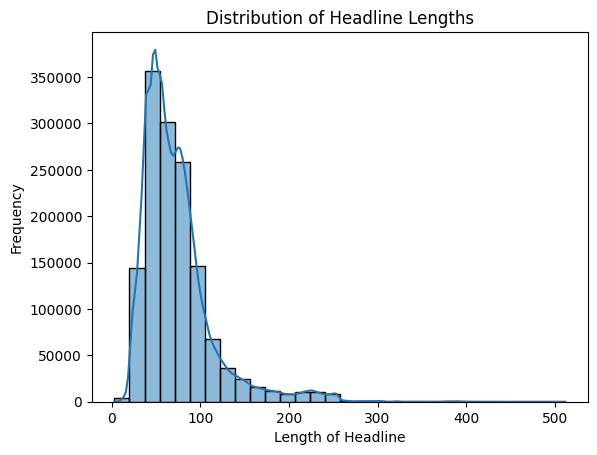

In [25]:
df['headline_length'] = df['headline'].astype(str).apply(len)
print(df['headline_length'].describe())

sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()


Count Articles per Publisher

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64


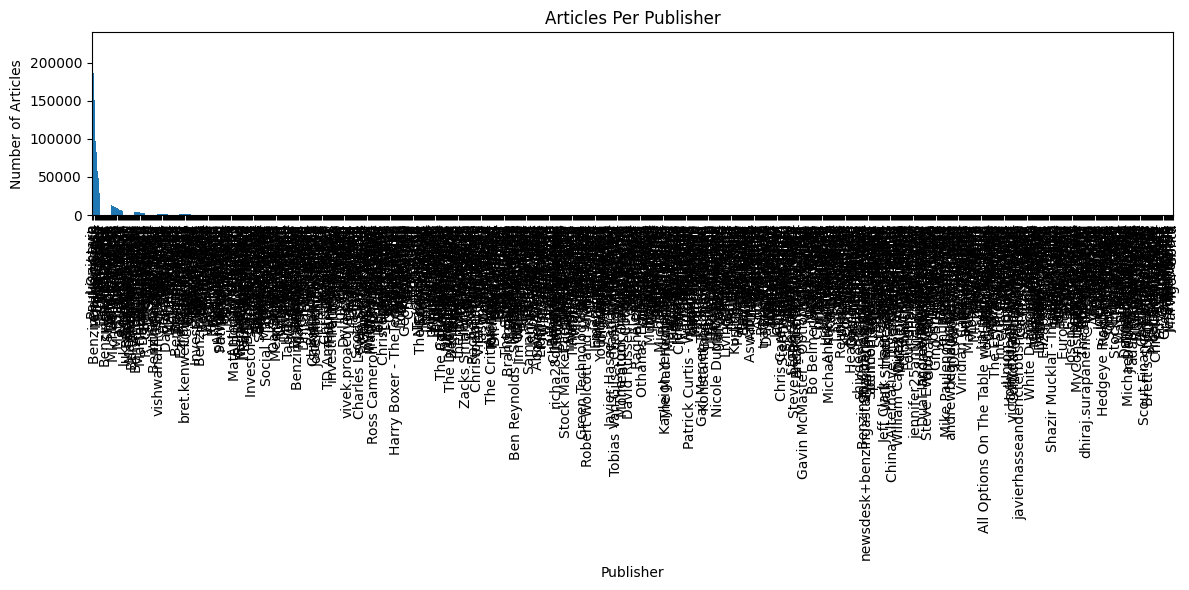

In [26]:
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

publisher_counts.plot(kind='bar', figsize=(12, 6), title='Articles Per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Analyze Publication Dates (Trends)

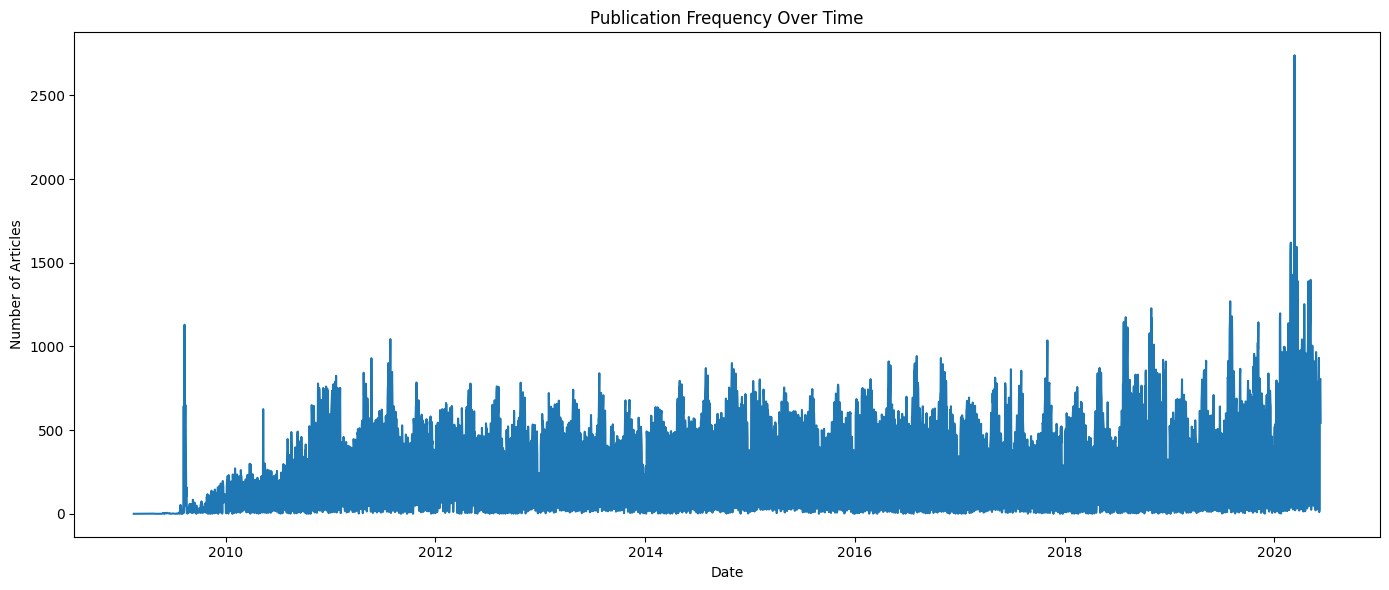

In [27]:
df['publish_day'] = df['date'].dt.date
daily_counts = df.groupby('publish_day').size()

daily_counts.plot(figsize=(14, 6), title='Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


Keyword/Phrase Extraction + WordCloud

Top Keywords:
['earnings' 'eps' 'est' 'from' 'market' 'pt' 'reports' 'sales' 'shares'
 'stocks' 'top' 'up' 'update' 'vs' 'week']


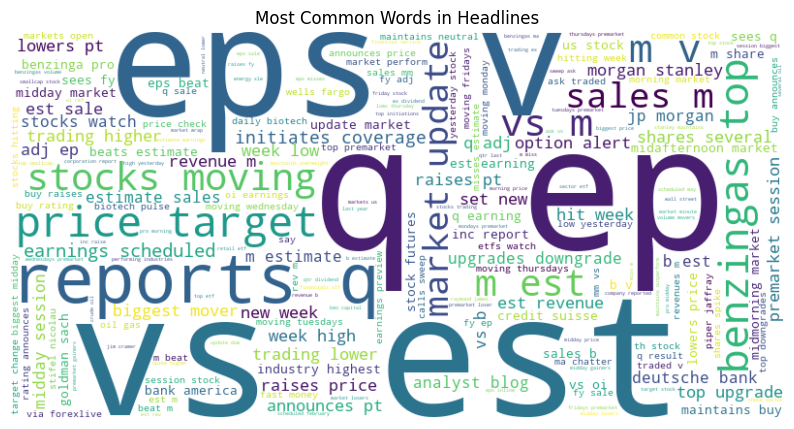

In [37]:
# Simple stopword list (you can expand it)
stop_words = {
    "the", "and", "is", "in", "to", "of", "a", "for", "on", "with", "as", "by", "at", "an", "be"
}

def preprocess(text):
    if not isinstance(text, str):
        return ''
    # Lowercase and keep only alphabets and spaces
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    tokens = text.split()
    filtered_tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(filtered_tokens)

# Apply preprocessing
df['processed_headline'] = df['headline'].apply(preprocess)

# Vectorize
vectorizer = CountVectorizer(max_features=15)
X = vectorizer.fit_transform(df['processed_headline'])

print("Top Keywords:")
print(vectorizer.get_feature_names_out())

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_headline']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Headlines')
plt.show()

Publication Frequency Over Time

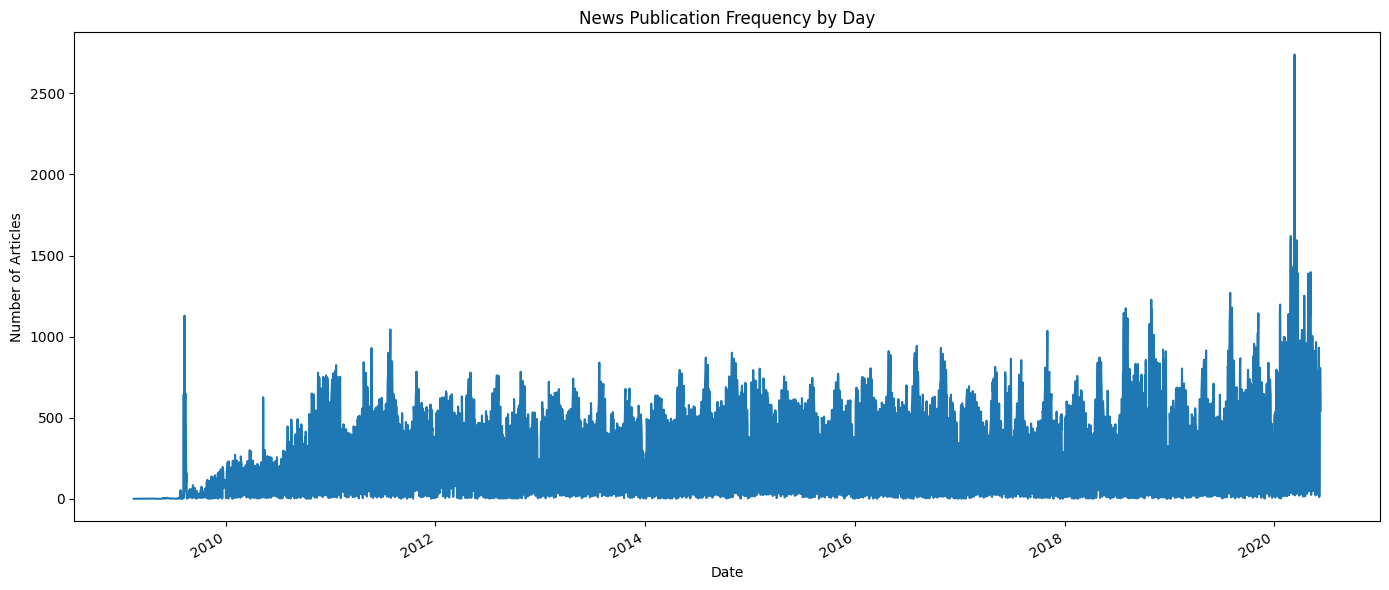

In [39]:
df['publish_day'] = df['date'].dt.date
df['publish_day'] = pd.to_datetime(df['publish_day'])

daily_freq = df.groupby('publish_day').size()

daily_freq.plot(figsize=(14, 6), title='News Publication Frequency by Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


Peak Times of Publication (Hourly Trends)

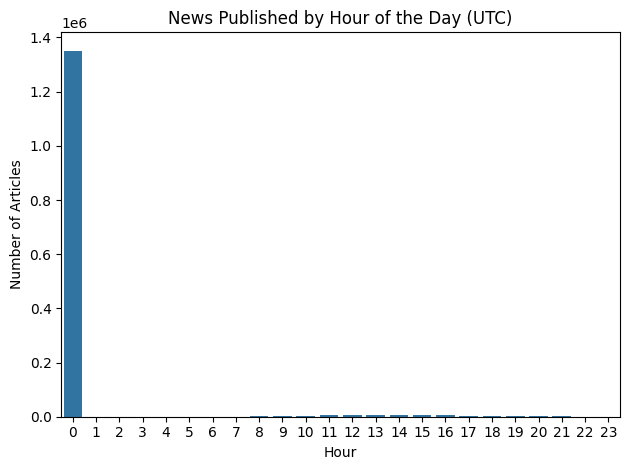

In [40]:
df['hour'] = df['date'].dt.hour

sns.countplot(x='hour', data=df)
plt.title('News Published by Hour of the Day (UTC)')
plt.xlabel('Hour')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

Publisher Contribution Overview

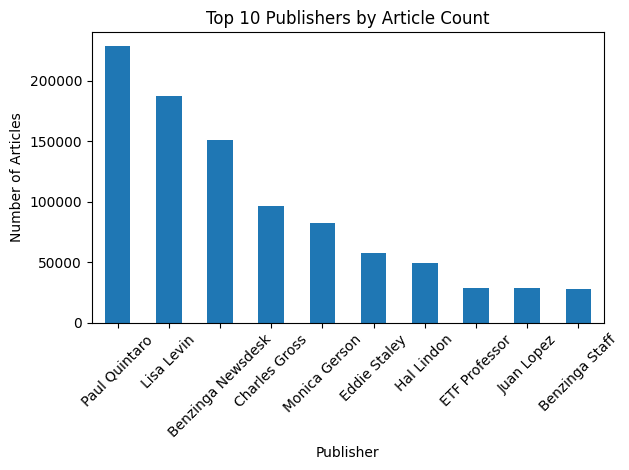

In [41]:
top_publishers = df['publisher'].value_counts().head(10)

top_publishers.plot(kind='bar', title='Top 10 Publishers by Article Count')
plt.ylabel('Number of Articles')
plt.xlabel('Publisher')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Check for Email Addresses in Publisher Column

In [42]:
import re

df['email_domain'] = df['publisher'].apply(
    lambda x: re.search(r'@([\w\.-]+)', str(x)).group(1) if re.search(r'@([\w\.-]+)', str(x)) else None
)

email_domains = df['email_domain'].dropna().value_counts()
print("Top email domains (if any):")
print(email_domains)


Top email domains (if any):
email_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
